### Imports

In [7]:
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

In [8]:
%run "./instance_10.ipynb"

In [9]:
%run "./functions.ipynb"

### Master Problem

In [10]:
# suppress Gurobi output
environment = gp.Env(empty = True)
environment.setParam("OutputFlag", 0)
environment.start()

# model
master = gp.Model('master', env = environment)

# variables + objective function
z = master.addVars(potential_hubs, capacity_levels, obj = fixed_set_up_costs_with_capacity_level, vtype = GRB.BINARY, name = "z")
eta = master.addVar(1, obj = 1, name = 'eta')

# model sense
master.ModelSense = GRB.MINIMIZE

# constraints
master.addConstr(gp.quicksum(gp.quicksum(new_hub_capacities[i, q] * z[i, q] for i in potential_hubs) for q in capacity_levels) >= gp.quicksum(demand_flattened[k - 1] for k in commodities));
master.addConstrs(gp.quicksum(z[i, q] for q in capacity_levels) <= 1 for i in potential_hubs);

### Run Benders decomposition

In [11]:
z_hat, upper_bound = benders_decomp() # <--- this code would not execute on my computer, but assuming you have an academic Gurobi license, it should work

GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license

In [ ]:
# z_hat

NameError: name 'z_hat' is not defined

### Visualizations

NameError: name 'z_hat' is not defined

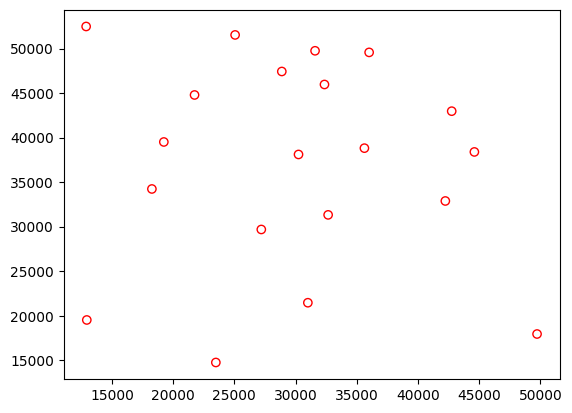

In [ ]:
# plt.scatter(x_coords, y_coords, facecolors = 'None', edgecolors = 'r')
# plt.show()


# for i in nodes:
#     if (z_hat[i, 1] == 1) | (z_hat[i, 2] == 1) | (z_hat[i, 3] == 1):
#         plt.plot(coords[i - 1][0], coords[i - 1][1])

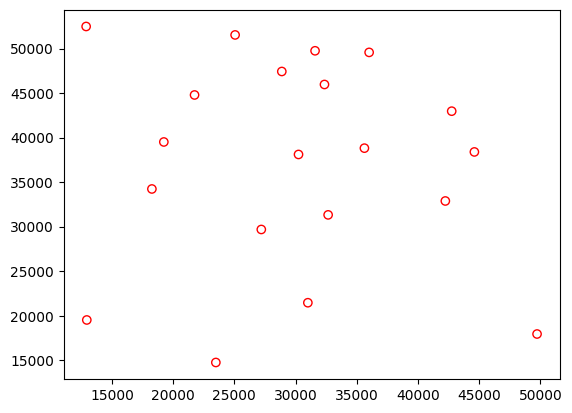

In [ ]:
# plt.scatter(x_coords, y_coords, facecolors = 'None', edgecolors = 'r')
# # plt.show()

# for i in coords:
#     if i == 5:
#         plt.plot(x_coords[i], y_coords[i])

# plt.show()